In [44]:
import quandl

In [45]:
# Quandl URL
df = quandl.get('WIKI/GOOGL')

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [24]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [46]:
df.columns

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_Change'],
      dtype='object')

In [47]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [48]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [49]:
df.isnull().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

## Feature Selection

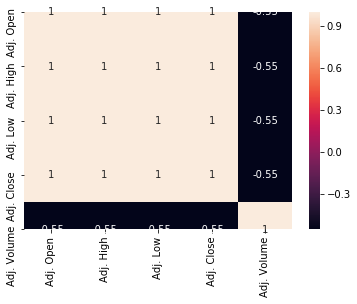

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)

In [51]:
#High Low%
df['HL_PCT'] = ((df['Adj. High'] - df['Adj. Low'])/df['Adj. Close'])*100

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792


In [53]:
df['PCT_Change'] = ((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'])*100

In [54]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_Change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [55]:
df_new = df [['Adj. Close','Adj. Volume','HL_PCT','PCT_Change']]

In [56]:
df_new.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_Change
Date,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968
2004-08-20,54.322689,22834300.0,7.921706,7.227007
2004-08-23,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,53.164113,9188600.0,3.886792,1.183658


In [57]:
x = df[['Adj. Volume' , 'HL_PCT','PCT_Change']]
y = df[["Adj. Close"]]

In [58]:
from sklearn.preprocessing import scale
X_new = scale(x)
X_new

array([[ 4.46712802,  4.25846492,  0.23254018],
       [ 1.8207495 ,  4.15018674,  4.81828847],
       [ 1.26561472,  1.3780063 , -0.79917922],
       ...,
       [-0.65539548,  1.40180729, -1.55184968],
       [-0.55124957,  1.78591425,  0.23733959],
       [-0.59144015,  3.23683162, -3.54051775]])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y,test_size = 0.2)


In [65]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)